In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_excel("/content/Online retail.xlsx",header=None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [3]:
# Converting each value as each column
df_new = df[0].str.split(',', expand=True)
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [4]:
trans = []
for i in range(0, 7501):
  trans.append([str(df_new.values[i,j]) for j in range(0, 20)])

In [5]:
trans

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None'],
 ['chutney',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None'],
 ['turkey',
  'avocado',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None',
  'None'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wh

In [6]:
len(trans)

7501

In [8]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=85ff5671e60809bf718045bd5c6ac8a6527e6a26add4f0b8b715e5a5da2361ee
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [9]:
# Implementing an Apriori algorithm
from apyori import apriori
rules = apriori(transactions = trans,
                min_support = 0.003,
                min_confidence = 0.2,
                min_lift = 3,
                min_length = 2, max_length = 2)

In [10]:
rules

<generator object apriori at 0x78c4fcadd150>

In [11]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [12]:
results[0][1] # support

0.004532728969470737

In [13]:
results[0][2][0][0] # base item

frozenset({'light cream'})

In [14]:
results[0][2][0][1] # add item

frozenset({'chicken'})

In [15]:

results[0][2][0][2] # confidence

0.29059829059829057

In [16]:
results[0][2][0][3] # lift

4.84395061728395

In [17]:
a = []
b = []
c = []
d = []
e = []


for i in range(0,9):
    c.append(results[i][1]) # support
    a.append(results[i][2][0][0]) # base item
    b.append(results[i][2][0][1]) # add item
    d.append(results[i][2][0][2]) # confidence
    e.append(results[i][2][0][3]) # lift

In [19]:

d1 = pd.DataFrame(a)
d2 = pd.DataFrame(b)
d3 = pd.DataFrame(c)
d4 = pd.DataFrame(d)
d5 = pd.DataFrame(e)

In [20]:
newdata = pd.concat([d1,d2,d3,d4,d5],axis=1)
newdata.columns = ['baseitem','additem','support','cofidence','lift']
newdata

,baseitem,additem,support,cofidence,lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [21]:
# Sort the rules by lift in descending order
sorted_rules = newdata.sort_values('lift', ascending=False)

# Print the top 5 rules with highest lift
print(sorted_rules.head())

# Analyze the rules
# For example, the rule with the highest lift suggests that customers who buy "fromage blanc"
# are very likely to also buy "honey". This could indicate that these items are
# often purchased together.

            baseitem    additem   support  cofidence      lift
3      fromage blanc      honey  0.003333   0.245098  5.164271
0        light cream    chicken  0.004533   0.290598  4.843951
2              pasta   escalope  0.005866   0.372881  4.700812
8              pasta     shrimp  0.005066   0.322034  4.506672
7  whole wheat pasta  olive oil  0.007999   0.271493  4.122410


<Axes: ylabel='baseitem'>

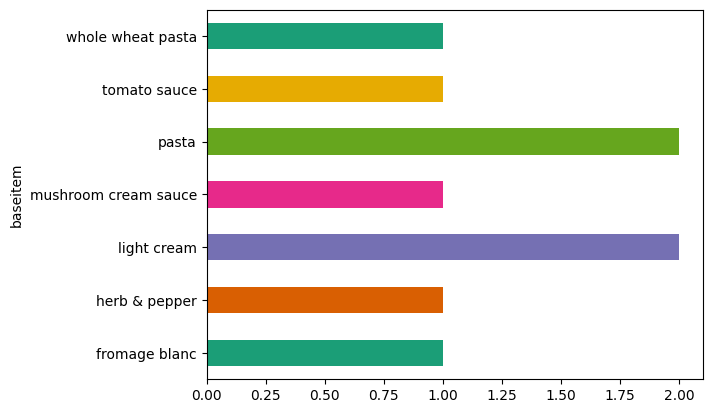

In [22]:
# Base item
newdata.groupby('baseitem').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='additem'>

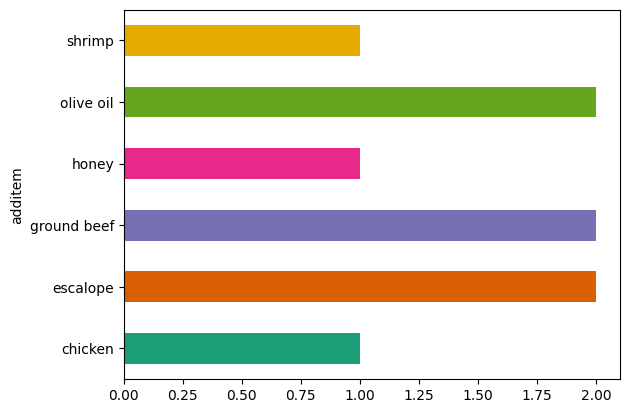

In [23]:
# Add item
newdata.groupby('additem').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))